In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sample_img = 'D:/coding/data_set/lomin/000000.png'

In [3]:
import cv2

img = cv2.imread(sample_img)


print(type(img))
print(img.shape)
print(type(img.shape))

<class 'numpy.ndarray'>
(2339, 1654, 3)
<class 'tuple'>


In [4]:
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   1654
height:  2339
channel: 3


In [5]:
# 이미지 회전
img = cv2.imread(sample_img, cv2.IMREAD_COLOR)
 
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향으로 90도 회전 
                                                         # = 시계방향으로 270도 회전
 

img5 = cv2.rotate(img, cv2.ROTATE_15_CLOCKWISE)

# cv2.imshow('original', img)
# cv2.imshow('rotate90', img90)
# cv2.imshow('rotate180', img180)
# cv2.imshow('rotate270', img270)
cv2.imshow('rotate5', img5)
 
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: module 'cv2.cv2' has no attribute 'ROTATE_15_CLOCKWISE'

In [6]:
''' made by 안산드레아스 이미지 회전하기 필요 패키지 : python-opencv ''' 
import cv2 
''' 이미지를 돌리는 함수 :param 
img : 이미지 
degree : 회전각 ''' 

def im_rotate(img, degree): 
    h, w = img.shape[:-1]
    crossLine = int(((w * h + h * w) ** 0.5)) 
    centerRotatePT = int(w / 2), int(h / 2)     
    new_h, new_w = h, w 
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1) 
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h)) 
    return result 

# 현재경로의 이미지 불러오기 
sample = cv2.imread(sample_img) 
cv2.imshow('org', sample) # 함수 실행하기 

# 원본영상의 자를 영역 원점 x,y좌표 지정. 그리고 새로 생성할 이미지 frame크기 지정 
result = im_rotate(sample, 10) 
cv2.imshow('img', result) 
cv2.waitKey(0) 
cv2.destroyAllWindows()



In [13]:
# 테두리 여백 추가하기
# https://codesample-factory.tistory.com/797

import numpy as np
import cv2

im = cv2.imread(sample_img)
row, col = im.shape[:2]
bottom = im[row-2:row, 0:col]
mean = cv2.mean(bottom)[0]

bordersize = 100
border = cv2.copyMakeBorder(
    im,
    top=bordersize,
    bottom=bordersize,
    left=bordersize,
    right=bordersize,
    borderType=cv2.BORDER_CONSTANT,
    value=[mean, mean, mean]
)

cv2.imshow('image', im)
cv2.imshow('bottom', bottom)
cv2.imshow('border', border)
cv2.waitKey(0)
cv2.destroyAllWindows()

추가 여분

(중심점 기준 생각)

위, 아래 = 대각선 길이/2 - 높이/2

양 옆 = 대각선 길이/2 - 넓이/2 

total 정사각형이 될 것. 그 안에 직사각형 문서가 바운딩 됨 (중심점 기준)

이미지의 위 와 가까운 곳 찾기 (원본, 90도, 180도, 270도 회전) 4포인트 확인
이미지가 회전은 -45 ~ 45 도 만큼 학습.

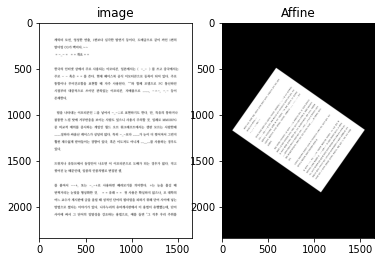

<Figure size 432x576 with 0 Axes>

In [4]:
# 이미지 회전
# https://076923.github.io/posts/Python-opencv-6/

import cv2
import matplotlib.pyplot as plt

sample_img = 'D:/coding/data_set/lomin/000000.png'

src = cv2.imread(sample_img, cv2.IMREAD_COLOR)

height, width, channel = src.shape

##                         중심점(center), 각도(angle), 비율(scale)
matrix = cv2.getRotationMatrix2D((width/2, height/2), 55, 0.5)
dst = cv2.warpAffine(src, matrix, (width, height))

cv2.imwrite('D:/coding/data_set/lomin/after/'+'000000'+'.png',dst)

#
# cv2.imshow("src", src)
# cv2.imshow("dst", dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

########## 
plt.subplot(121),plt.imshow(src),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.figure(figsize=(6,8))
plt.show()


In [11]:
print("높이 : ",height)
print("넓이 : ",width)
print("체널 : ",channel)

높이 :  2339
넓이 :  1654
체널 :  3


--- 
삭제

In [ ]:
## 주의 - 시간복잡도 증가

## 이미지와 xml 파일을 랜덤으로 골라 각도별 폴더에 복사 붙여넣기 (memory out 방지)
## 각도는 신경 안쓰고 폴더에 파일 분배만 함
import glob
import shutil

dir = 'D:/coding/data_set/lomin/train_copy/train/'

# 새 파일 넣을 경로 및 폴더 만들기
dir_after = 'D:/coding/data_set/lomin/train_copy/train_angle/'
os.makedirs(dir_after)

# dir 에 png 파일 선택 (내림차순)
dir_png = sorted(glob.glob(dir+'/*.png'))

## 각 폴더마다 몇개의 샘플을 만들 것인가?
num_img = 20

# 원하는 각도 만큼 폴더 생성
for i in range(0,5):
    
    # dir의 png 파일 중 랜덤으로 n개 선택 (비중복)
    png_random = sorted(np.random.choice(dir_png, num_img, replace=False))
    
    my_angle = i

    # 각도별 폴더 생성
    os.makedirs(dir_after + str(my_angle)) 
    
    for idx in png_random:

        # 랜덤 이미지 파일을 복사
        xml_random = idx.split('\\')[0]+'/'+idx.split('\\')[-1].split('.')[0]+'.png'
        shutil.copy(xml_random, dir_after + str(my_angle) + '/')
        
        # 랜덤 이미지와 같은 xml 파일을 복사
        xml_random = idx.split('\\')[0]+'/'+idx.split('\\')[-1].split('.')[0]+'.xml'
        shutil.copy(xml_random, dir_after + str(my_angle) + '/')


---

In [9]:
import xml.etree.ElementTree as ET

def read_anntation(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    bounding_box_list = []

    file_name = root.find('filename').text
    for obj in root.iter('object'):

        object_label = obj.find("name").text
        for box in obj.findall("bndbox"):
            x_min = int(box.find("xmin").text)
            y_min = int(box.find("ymin").text)
            x_max = int(box.find("xmax").text)
            y_max = int(box.find("ymax").text)

        bounding_box = [object_label, x_min, y_min, x_max, y_max]
        bounding_box_list.append(bounding_box)

    return bounding_box_list, file_name

In [10]:
from os import listdir
import cv2
import numpy as np

def read_train_dataset(dir):
    images = []
    annotations = []

    for file in listdir(dir):
        if 'jpg' in file.lower() or 'png' in file.lower():
            images.append(cv2.imread(dir + file, 1))
            annotation_file = file.replace(file.split('.')[-1], 'xml')
            bounding_box_list, file_name = read_anntation(dir + annotation_file)
            annotations.append((bounding_box_list, annotation_file, file_name))

    # images = np.array(images) # 이미 array 가 되어 있음

    return images, annotations

In [20]:
import imgaug as ia
import os
from imgaug import augmenters as iaa
# from files import *
from pascal_voc_writer import Writer

ia.seed(1)

dir = 'D:/coding/data_set/lomin/train_copy/train_angle/'

# 모든 폴더 순환
for j in os.listdir(dir):
    dir_d = dir + j + '/'

    images, annotations = read_train_dataset(dir_d)

    for idx in range(len(images)):
        image = images[idx]
        boxes = annotations[idx][0]

        ia_bounding_boxes = []
        for box in boxes:
            ia_bounding_boxes.append(ia.BoundingBox(x1=box[1], y1=box[2], x2=box[3], y2=box[4]))

        bbs = ia.BoundingBoxesOnImage(ia_bounding_boxes, shape=image.shape)

        seq = iaa.Sequential([
            # iaa.Multiply((1.2, 1.5)),
            iaa.Affine(
                # translate_px={"x": 40, "y": 60},
                # scale=(0.5, 0.7),
                rotate = int(j)
            )
        ])

        seq_det = seq.to_deterministic()

        image_aug = seq_det.augment_images([image])[0]
        bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

        # new_image_file = dir + 'after_' + annotations[idx][2]
        new_image_file = dir_d + annotations[idx][2]
        cv2.imwrite(new_image_file, image_aug)

        h, w = np.shape(image_aug)[0:2]
        voc_writer = Writer(new_image_file, w, h)

        for i in range(len(bbs_aug.bounding_boxes)):
            bb_box = bbs_aug.bounding_boxes[i]
            voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

        # voc_writer.save(dir + 'after_' + annotations[idx][1])
        voc_writer.save(dir_d + annotations[idx][1])


In [17]:
dir = 'D:/coding/data_set/lomin/train_copy/train_angle/'
for i in os.listdir(dir):
    print(i)

0
1
2
3
4


----

In [1]:
## 이미지 자르기

import cv2

dir = 'D:/coding/data_set/lomin/'
src = cv2.imread(dir + '000000.png', cv2.IMREAD_UNCHANGED)

# 이미지를 자른다.
dst = src[0:200, 0:500].copy()

cv2.imshow('source', src)
cv2.imshow('cut image', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

---

In [ ]:
## 참고 - 하위 폴더만 출력
# https://blog.naver.com/monkey5255/221758850260

import os

DATA_PAHT = 'D:/coding/data_set/lomin/train_copy/'

def enum_folder_only(dirname):
    for filename in os.listdir(dirname):
        file_path = os.path.join(dirname,filename)
        if os.path.isdir(file_path):
            print(file_path)
            enum_folder_only(file_path)

enum_folder_only(DATA_PAHT)

In [36]:
## DATA_PAHT 에 폴더 목록 출력
import os, glob

DATA_PAHT = 'D:/coding/data_set/lomin/train_copy/'
# os.listdir(DATA_PAHT)   # 폴더 내 모두 출력

for filename in os.listdir(DATA_PAHT):
    file_path = os.path.join(dirname,filename)
    if os.path.isdir(file_path) == True:
        print(file_path.split('/')[-1])


train
train_angle
val
val_angle


In [37]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train_angle')
VAL_IMG_PATH = os.path.join(DATA_PATH, 'val_angle')


# # CSV 파일 경로
# df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
# df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
# df_class = pd.read_csv(os.path.join(DATA_PATH, 'class.csv'))

# # IMG_SIZE
# img_size = (224, 224)

In [38]:
TRAIN_IMG_PATH

'D:/coding/data_set/lomin/train_copy\\train_angle'

In [ ]:
pd.read_xml(os.path.join(DATA_PATH, 'train.csv'))

In [ ]:
df_train.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [ ]:
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,00001.jpg,30,52,246,147
1,00002.jpg,100,19,576,203
2,00003.jpg,51,105,968,659
3,00004.jpg,67,84,581,407
4,00005.jpg,140,151,593,339


In [ ]:
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


In [ ]:
df_class[df_class['id'] == 32]

,id,name
31,32,BMW X5 SUV 2007


https://kr.mathworks.com/help/deeplearning/ug/train-a-convolutional-neural-network-for-regression.html#TrainAConvolutionalNeuralNetworkForRegressionExample-1



https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/


https://blog.naver.com/PostView.naver?blogId=sogangori&logNo=221394792477&redirect=Dlog&widgetTypeCall=true&directAccess=false





In [7]:
## Annotation 읽기

# https://junyoung-jamong.github.io/machine/learning/2019/01/23/%EB%B0%94%EC%9A%B4%EB%94%A9%EB%B0%95%EC%8A%A4%EB%A5%BC-%ED%8F%AC%ED%95%A8%ED%95%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%A6%9D%ED%8F%AD%EC%8B%9C%ED%82%A4%EA%B8%B0-with-imgaug.html


dir = 'D:/coding/data_set/lomin/117/'

import xml.etree.ElementTree as ET

def read_anntation(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    bounding_box_list = []

    file_name = root.find('filename').text
    for obj in root.iter('object'):

        object_label = obj.find("name").text
        for box in obj.findall("bndbox"):
            x_min = int(box.find("xmin").text)
            y_min = int(box.find("ymin").text)
            x_max = int(box.find("xmax").text)
            y_max = int(box.find("ymax").text)

        bounding_box = [object_label, x_min, y_min, x_max, y_max]
        bounding_box_list.append(bounding_box)

    return bounding_box_list, file_name

In [8]:
os.listdir(dir)   # 폴더 내 모두 출력

['000025.png', '000025.xml']

In [19]:
tree = ET.parse(dir + '000025.xml')
root = tree.getroot()
bounding_box_list = []
file_name = root.find('filename').text

for obj in root.iter('object'):
    
    object_label = obj.find("name").text
    for box in obj.findall("bndbox"):
        x_min = int(box.find("xmin").text)
        y_min = int(box.find("ymin").text)
        x_max = int(box.find("xmax").text)
        y_max = int(box.find("ymax").text)
        
    bounding_box = [object_label, x_min, y_min, x_max, y_max]
    bounding_box_list.append(bounding_box)

In [20]:
bounding_box

['doc', 18, 446, 1635, 1892]

In [21]:
bounding_box_list, file_name

([['doc', 18, 446, 1635, 1892]], '000025.png')

In [18]:
%%time
####### 폴더 추가해서 복사하기 ####################

## 테두리가 만들어진 이미지 폴더들을 순화하며 폴더 명에 따라 회전 시키기

## 순환이 문자로(j) 인식되기 때문에 0, 1, 10, 100, 101, 102, 103... 109, 11, 110.. 순으로 작업 수행

import imgaug as ia
import glob
import os
from imgaug import augmenters as iaa
# from files import *
from pascal_voc_writer import Writer

import xml.etree.ElementTree as ET

ia.seed(1)

# dir = 'D:/coding/data_set/lomin/train_copy/train_angle/' # train 테스트셋
# dir = 'D:/coding/data_set/lomin/train_copy/val_angle/' # val 테스트셋

dir = 'D:/coding/data_set/lomin/temp/val_angle/' # val 테스트셋

# 모든 폴더 순환
for j in sorted(os.listdir(dir)):
    dir_d = dir + j + '/' 

    # os.makedirs(dir_d + '/dgr_' + j) 
    dir_2 = dir_dgr = dir_d + 'dgr_' + j #+ '/'
    
    # ---
    # f = dir_2
    # label = f.split('/')[-2].split('_')[1]
    
    # print(label)
    # # print(os.listdir(f))
    # dir_png = sorted(glob.glob(dir_2+'/*.xml'))
    # print(dir_png)
    
    # # for i in os.listdir(f):
    # ---
    

    ## 폴더안에 있는 모든 xml 파일 이름 가져오기
    file_list = os.listdir(dir_2)
    xml_list = []
    
    for file in file_list:
        if '.xml' in file:
            xml_list.append(file)

    ## 모든 .xml파일에 대해 수정
    for xml_file in xml_list:
        target_path = dir_2 + "/" + xml_file
        targetXML = open(target_path, 'rt', encoding='UTF8')

        tree = ET.parse(targetXML)

        root = tree.getroot()
        
        ##수정할 부분
        target_tag = root.find("object/name")  # boject 하위 name 

        original = target_tag.text     #원본 String
        modified = original.replace(r"0",j)  # 0을 j 로 바꿈
        # modified = modified.replace("/", "\\")
        target_tag.text = modified  #수정
        
        tree.write(target_path)
        
## https://skkim1080.tistory.com/entry/Python%EC%9C%BC%EB%A1%9C-xml-%ED%8C%8C%EC%9D%BC-%EB%82%B4%EC%9A%A9-%EC%88%98%EC%A0%95%ED%95%98%EA%B8%B0



Wall time: 69 ms
